In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from datasets import load_dataset, load
from huggingface_hub import hf_hub_download, snapshot_download


## Download raw EBSD scans (.ctf)

In [2]:
snapshot_download(repo_id="Rxzh/EBSD-scans", allow_patterns="*.ctf",repo_type="dataset",local_dir='data/')

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

'/home/pbelamriregenpied1/Documents/EBSD-map-gen/data'

## Generate orientation maps

In [3]:
from pymicro.crystal.ebsd import OimScan
from pymicro.crystal.lattice import Lattice, CrystallinePhase, Symmetry
from pymicro.crystal.microstructure import Microstructure
import numpy as np
from pymicro.crystal.quaternion import Quaternion

In [17]:
epsilon = np.finfo('float').eps


def up_axis(axis):
    if abs(axis[2]) > epsilon:
        if axis[2] < 0.:
            # reverse axis
            return -1. * axis
    elif abs(axis[1]) > epsilon:
        if axis[1] < 0:
            # reverse axis and zero z component
            return np.array([-axis[0], -axis[1], 0.])
    elif axis[0] < 0.:
        # reverse axis and zero y and z components
        return np.array([-axis[0], 0., 0.])
    return axis


def get_quats(scan):
    eulers = np.reshape(scan.euler, (np.prod(scan.iq.shape), 3))
    scan.quats = np.empty((list(scan.iq.shape) + [4]), float)
    print(eulers.shape)
    phi1, Phi, phi2 = np.squeeze(np.split(eulers, 3, axis=1))
    q0 = np.cos(0.5 * (phi1 + phi2)) * np.cos(0.5 * Phi)
    q1 = np.cos(0.5 * (phi1 - phi2)) * np.sin(0.5 * Phi)
    q2 = np.sin(0.5 * (phi1 - phi2)) * np.sin(0.5 * Phi)
    q3 = np.sin(0.5 * (phi1 + phi2)) * np.cos(0.5 * Phi)
    quats = np.array([q0, q1, q2, q3]).T
    # the scalar part must be positive
    quats = quats * np.sign(q0).reshape([-1, 1])
    # handle ambiguous rotation
    ambig = np.where(quats[:, 0] < 3 * epsilon)[0]
    for i in ambig:
        axis = up_axis(quats[i, 1:])
        quats[i] = np.array([0., *axis])
    quats = quats.reshape(scan.quats.shape)
    print(quats.shape)

    return quats

In [23]:
if not(os.path.exists('data/quat_ebsd_maps/')): os.mkdir('data/quat_ebsd_maps/')
    
for fname in os.listdir('data/raw_ebsd_scans/'):
    scan = OimScan.from_file(os.path.join('data/raw_ebsd_scans/',fname),use_spatial_ref_frame=True )
    quats = get_quats(scan)
    np.save(os.path.join('data/quat_ebsd_maps/',fname.replace('.ctf','.npy')), quats)



19-B590 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
using spatial reference frame for orientation data


changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 496023/496023 [00:24<00:00, 20229.12it/s]




(500000, 3)
(500, 1000, 4)
19-B588 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
using spatial reference frame for orientation data


changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 499680/499680 [00:24<00:00, 20727.77it/s]




(500000, 3)
(1000, 500, 4)
19-B591 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
using spatial reference frame for orientation data


changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 499302/499302 [00:24<00:00, 20240.36it/s]




(500000, 3)
(500, 1000, 4)
ERC_IN718_25h_5h_1080C 5_4 Site 1 Map Data 14 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
adding phase Phase 2 (Delta Ni3Nb56) 
	-- Lattice (Symmetry.orthorhombic) a=0.514, b=0.423, c=0.453 alpha=90.0, beta=90.0, gamma=90.0
using spatial reference frame for orientation data


changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 797409/797409 [00:40<00:00, 19494.88it/s]




(800000, 3)
(1000, 800, 4)
IN718_NEWTEC Nanoindentation 5min Nano-5m Site 1 Map Data 5_clean .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
using spatial reference frame for orientation data


changing orientation reference frame progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 8406828/8406828 [07:09<00:00, 19593.61it/s]




(8406828, 3)
(3348, 2511, 4)
19-B589 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
using spatial reference frame for orientation data


changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 499582/499582 [00:25<00:00, 19780.31it/s]




(500000, 3)
(500, 1000, 4)
ERC_IN718_20210723 Specimen indent Site 2 Map Data 3 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
adding phase Phase 2 (Delta Ni3Nb56) 
	-- Lattice (Symmetry.orthorhombic) a=0.514, b=0.423, c=0.453 alpha=90.0, beta=90.0, gamma=90.0
using spatial reference frame for orientation data


changing orientation reference frame progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2677745/2677745 [02:13<00:00, 20002.58it/s]




(2690080, 3)
(1978, 1360, 4)


## Generate grains ids maps

In [25]:
from tqdm.notebook import tqdm

In [27]:
if not(os.path.exists('data/grains_ids_maps/')): os.mkdir('data/grains_ids_maps/')
    
for fname in tqdm(os.listdir('data/raw_ebsd_scans/')):
    scan = OimScan.from_file(os.path.join('data/raw_ebsd_scans/',fname),use_spatial_ref_frame=True )
    grains_map = scan.segment_grains(tol=5., min_ci=-0.1)
    np.save(os.path.join('data/grains_ids_maps/',fname.replace('.ctf','.npy')), grains_map)

  0%|          | 0/7 [00:00<?, ?it/s]

19-B590 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
using spatial reference frame for orientation data



changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 496023/496023 [00:26<00:00, 18742.97it/s]
/home/pbelamriregenpied1/Documents/pymicro/pymicro/pymicro/crystal/microstructure.py:444: RuntimeWarning: invalid value encountered in divide
  n /= np.sqrt((delta[1, 2] - delta[2, 1]) ** 2 +




grain segmentation for EBSD scan, misorientation tolerance=5.0, minimum confidence index=-0.1
segmentation progress: 100.00 %
2205 grains were segmented
19-B588 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
using spatial reference frame for orientation data



changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 499680/499680 [00:26<00:00, 19165.45it/s]




grain segmentation for EBSD scan, misorientation tolerance=5.0, minimum confidence index=-0.1
segmentation progress: 100.00 %
3334 grains were segmented
19-B591 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
using spatial reference frame for orientation data



changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 499302/499302 [00:25<00:00, 19542.34it/s]




grain segmentation for EBSD scan, misorientation tolerance=5.0, minimum confidence index=-0.1
segmentation progress: 100.00 %
3237 grains were segmented
ERC_IN718_25h_5h_1080C 5_4 Site 1 Map Data 14 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
adding phase Phase 2 (Delta Ni3Nb56) 
	-- Lattice (Symmetry.orthorhombic) a=0.514, b=0.423, c=0.453 alpha=90.0, beta=90.0, gamma=90.0
using spatial reference frame for orientation data



changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 797409/797409 [00:40<00:00, 19489.98it/s]




grain segmentation for EBSD scan, misorientation tolerance=5.0, minimum confidence index=-0.1
segmentation progress: 100.00 %
3872 grains were segmented
IN718_NEWTEC Nanoindentation 5min Nano-5m Site 1 Map Data 5_clean .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
using spatial reference frame for orientation data



changing orientation reference frame progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 8406828/8406828 [07:45<00:00, 18066.56it/s]




grain segmentation for EBSD scan, misorientation tolerance=5.0, minimum confidence index=-0.1
segmentation progress: 100.00 %
2048 grains were segmented
19-B589 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
using spatial reference frame for orientation data



changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 499582/499582 [00:25<00:00, 19828.79it/s]




grain segmentation for EBSD scan, misorientation tolerance=5.0, minimum confidence index=-0.1
segmentation progress: 100.00 %
3087 grains were segmented
ERC_IN718_20210723 Specimen indent Site 2 Map Data 3 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
adding phase Phase 2 (Delta Ni3Nb56) 
	-- Lattice (Symmetry.orthorhombic) a=0.514, b=0.423, c=0.453 alpha=90.0, beta=90.0, gamma=90.0
using spatial reference frame for orientation data



changing orientation reference frame progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2677745/2677745 [02:19<00:00, 19128.54it/s]




grain segmentation for EBSD scan, misorientation tolerance=5.0, minimum confidence index=-0.1
segmentation progress: 100.00 %
748 grains were segmented


In [60]:
!open .

# Compute mean orientation maps

In [31]:
from pymicro.crystal.microstructure import Microstructure
import numpy as np

In [58]:
if not(os.path.exists('data/mean_quats_maps/')): os.mkdir('data/mean_quats_maps/')
    
for fname in tqdm(os.listdir('data/quat_ebsd_maps/')):
    if os.path.exists(os.path.join('data/mean_quats_maps/',fname,)):
        continue

    # load the segmentation
    grain_ids = np.squeeze(np.load(os.path.join('data/grains_ids_maps',fname)))
    
    # directly import the EBSD data, here we chose not to take the confidence index into account
    m = Microstructure.from_ebsd(os.path.join('data/raw_ebsd_scans',fname.replace('.npy','.ctf')),  grain_ids=grain_ids)

    m.quats = np.load(os.path.join('data/quat_ebsd_maps', fname))

    mean_quats_map = np.zeros_like(m.quats)
    for gid in tqdm(np.unique(grain_ids)):
        quats_gid = m.quats[np.where(grain_ids == gid)]
        mean_quat = np.mean(quats_gid, axis=0)
        mean_quat /= np.sqrt(np.sum(mean_quat ** 2))
        mean_quats_map[np.where(grain_ids == gid)] = mean_quat
    
    np.save(os.path.join('data/mean_quats_maps/',fname), mean_quats_map)


  0%|          | 0/7 [00:00<?, ?it/s]

0 phases found in the data set
new phase added: unknown
19-B590 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
importing data from region [0, 500, 0, 1000]
using spatial reference frame for orientation data



changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 496023/496023 [00:25<00:00, 19614.25it/s]




0 phases found in the data set
new phase added: Ni-superalloy
using existing segmentation containing 2205 grains, size is  (500, 1000)






creating new grains: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2205/2205 [05:43<00:00,  6.41it/s]


computing grains geometry


  0%|          | 0/2205 [00:00<?, ?it/s]

0 phases found in the data set
new phase added: unknown
19-B588 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
importing data from region [0, 1000, 0, 500]
using spatial reference frame for orientation data



changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 499680/499680 [00:26<00:00, 18603.85it/s]




0 phases found in the data set
new phase added: Ni-superalloy
using existing segmentation containing 3334 grains, size is  (1000, 500)






creating new grains: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3334/3334 [06:14<00:00,  8.91it/s]


computing grains geometry


  0%|          | 0/3334 [00:00<?, ?it/s]

0 phases found in the data set
new phase added: unknown
IN718_NEWTEC Nanoindentation 5min Nano-5m Site 1 Map Data 5_clean .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
importing data from region [0, 3348, 0, 2511]
using spatial reference frame for orientation data



changing orientation reference frame progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 8406828/8406828 [07:34<00:00, 18478.39it/s]




0 phases found in the data set
new phase added: Ni-superalloy
using existing segmentation containing 2048 grains, size is  (3348, 2511)






creating new grains: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2048/2048 [1:30:51<00:00,  2.66s/it]


computing grains geometry


  0%|          | 0/2048 [00:00<?, ?it/s]

0 phases found in the data set
new phase added: unknown
ERC_IN718_25h_5h_1080C 5_4 Site 1 Map Data 14 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
adding phase Phase 2 (Delta Ni3Nb56) 
	-- Lattice (Symmetry.orthorhombic) a=0.514, b=0.423, c=0.453 alpha=90.0, beta=90.0, gamma=90.0
importing data from region [0, 1000, 0, 800]
using spatial reference frame for orientation data



changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 797409/797409 [00:41<00:00, 19298.66it/s]




0 phases found in the data set
new phase added: Ni-superalloy
new phase added: Delta Ni3Nb56
using existing segmentation containing 3872 grains, size is  (1000, 800)






creating new grains: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3872/3872 [09:18<00:00,  6.94it/s]


computing grains geometry


  0%|          | 0/3872 [00:00<?, ?it/s]

0 phases found in the data set
new phase added: unknown
19-B591 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
importing data from region [0, 500, 0, 1000]
using spatial reference frame for orientation data



changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 499302/499302 [00:24<00:00, 20375.97it/s]




0 phases found in the data set
new phase added: Ni-superalloy
using existing segmentation containing 3237 grains, size is  (500, 1000)






creating new grains: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3237/3237 [06:02<00:00,  8.93it/s]


computing grains geometry


  0%|          | 0/3237 [00:00<?, ?it/s]

0 phases found in the data set
new phase added: unknown
19-B589 .ctf
using ref_frame 4
symmetry was changed to Symmetry.cubic
adding phase Phase 1 (Ni-superalloy) 
	-- Lattice (Symmetry.cubic) a=0.357, b=0.357, c=0.357 alpha=90.0, beta=90.0, gamma=90.0
importing data from region [0, 500, 0, 1000]
using spatial reference frame for orientation data



changing orientation reference frame progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 499582/499582 [00:25<00:00, 19854.22it/s]




0 phases found in the data set
new phase added: Ni-superalloy
using existing segmentation containing 3087 grains, size is  (500, 1000)






creating new grains: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3087/3087 [06:05<00:00,  8.46it/s]


computing grains geometry


  0%|          | 0/3087 [00:00<?, ?it/s]

# Create the tiles dataset

In [70]:
def create_tiles(image, tile_size):
    # Get the dimensions of the image
    height, width, c = image.shape

    # Calculate the number of tiles in each dimension
    num_tiles_x = width // tile_size
    num_tiles_y = height // tile_size

    # Initialize a list to hold the tiles
    tiles = []

    # Loop over the image and extract tiles
    for y in range(num_tiles_y):
        for x in range(num_tiles_x):
            # Extract the tile
            tile = image[y*tile_size:(y+1)*tile_size, x*tile_size:(x+1)*tile_size, :]
            np.nan_to_num(tile, nan=0.0, posinf=None, neginf=None)
            tiles.append(tile)

    return tiles

In [65]:
!ls data/mean_quats_maps/

 19-B588.npy
 19-B589.npy
 19-B590.npy
 19-B591.npy
'ERC_IN718_20210723 Specimen indent Site 2 Map Data 3.npy'
'ERC_IN718_25h_5h_1080C 5_4 Site 1 Map Data 14.npy'
'IN718_NEWTEC Nanoindentation 5min Nano-5m Site 1 Map Data 5_clean.npy'


In [67]:
!ls data

grains_ids_maps  mean_quats_maps  quat_ebsd_maps  raw_ebsd_scans


In [74]:
if not os.path.exists('data/tiles/'): os.mkdir('data/tiles')
if not os.path.exists('data/tiles/raw'): os.mkdir('data/tiles/raw')
if not os.path.exists('data/tiles/mean'): os.mkdir('data/tiles/mean')

In [66]:
train_val_fnames = ['19-B588.npy',
                     '19-B589.npy',
                     '19-B591.npy',
                    'ERC_IN718_20210723 Specimen indent Site 2 Map Data 3.npy',
                    'ERC_IN718_25h_5h_1080C 5_4 Site 1 Map Data 14.npy',
                    'IN718_NEWTEC Nanoindentation 5min Nano-5m Site 1 Map Data 5_clean.npy']

test_fnames = ['19-B590.npy']



In [84]:
dataset = pd.DataFrame()

for fname in train_val_fnames:
    print('File: {}'.format(fname))
    x_mean = np.load(os.path.join('data/mean_quats_maps/', fname))
    x_raw = np.load(os.path.join('data/quat_ebsd_maps/', fname))
    
    tiles_mean = create_tiles(x_mean, tile_size=128)
    tiles_raw = create_tiles(x_raw, tile_size=128)
    
    for idx, tile_mean in enumerate(np.array(tiles_mean)[:,:,:,0]):
        n_grains = len(np.unique(tile_mean))
        tile_idx = len(os.listdir('data/tiles/raw/'))

        np.save(f'data/tiles/raw/tile_{tile_idx}.npy',  tiles_raw[idx])
        np.save(f'data/tiles/mean/tile_{tile_idx}.npy', tile_mean)
        dataset = pd.concat([dataset, pd.DataFrame([int(tile_idx), int(n_grains)]).T])

    print('======================================================')
dataset.columns = ['tile_idx', 'n_grains']
dataset.set_index('tile_idx', inplace=True)

File: 19-B588.npy
File: 19-B589.npy
File: 19-B591.npy
File: ERC_IN718_20210723 Specimen indent Site 2 Map Data 3.npy
File: ERC_IN718_25h_5h_1080C 5_4 Site 1 Map Data 14.npy
File: IN718_NEWTEC Nanoindentation 5min Nano-5m Site 1 Map Data 5_clean.npy


(array([ 35., 109., 200., 116.,  76.,  63.,  14.,   8.,   5.,   4.,   5.,
          3.,   3.,   2.,   2.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   3.,   0.,   1.,   0.,   1.,   1.,   1.,   2.,   3.,   2.,
          4.,   3.,   0.,   2.,   6.,   3.,   3.,   6.,   4.,   4.,   3.,
          5.,   0.,   3.,   2.,   3.,   2.,   2.,   0.,   3.,   2.,   2.,
          2.,   1.,   3.,   1.,   2.,   1.,   1.,   1.,   0.,   2.,   1.,
          2.,   0.,   1.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1.  ,   3.35,   5.7 ,   8.05,  10.4 ,  12.75,  15.1 ,  17.45,
         19.8 ,  22.15,  24.5 ,  26.85,  29.2 ,  31.55,  33.9 ,  36.25,
         38.6 ,  40.95,  43.3 ,  45.65,  48.  ,  50.35,  52.7 ,  55.05,
         57.4 ,  59.75,  62.1 ,  64.45,  66.8 ,  69.15,  71.5 ,  73.85,
         76.2 ,  78.55,  80.9 

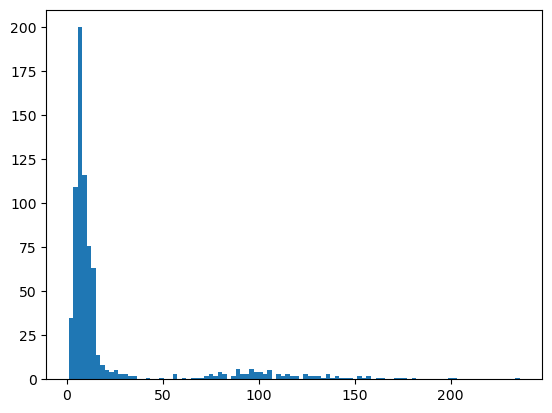

In [108]:
plt.hist(dataset['n_grains'], bins=100)
#plt.xlim(-10,50)

In [104]:
dataset.sort_values('n_grains', ascending=False).head(5)

n_grains
tile_idx          
252            236
218            202
12             200
48             180
6              175

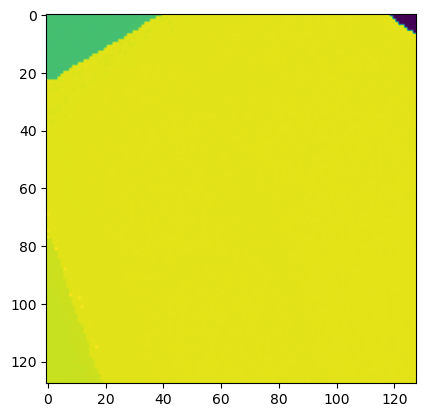

In [102]:
plt.imshow(np.load('data/tiles/raw/tile_425.npy')[:,:,0])

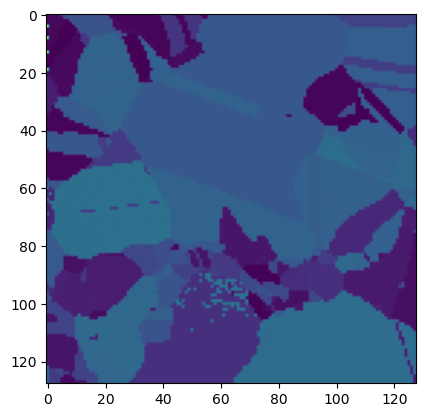

In [105]:
plt.imshow(np.load('data/tiles/raw/tile_12.npy')[:,:,0])

In [113]:
dataset.loc[dataset['n_grains']>50,'train_or_val'] = 'train'

In [119]:
df=dataset[dataset.isna()['train_or_val']]

In [124]:
df['n_grains_binned'] = pd.qcut(df['n_grains'], q=4, duplicates='drop')  # Adjust q based on your needs

# Perform the train-test split
X_train, X_test = train_test_split(
    df.index,  # Features
    test_size=0.2,  # 20% test size
    random_state=42,
    stratify=df['n_grains_binned']  # Stratify based on the binned variable
)

/tmp/ipykernel_937597/90275960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_grains_binned'] = pd.qcut(df['n_grains'], q=4, duplicates='drop')  # Adjust q based on your needs


In [122]:
from sklearn.model_selection import train_test_split

In [126]:
dataset.loc[X_train, 'train_or_val'] = 'train'
dataset.loc[X_test, 'train_or_val'] = 'val'

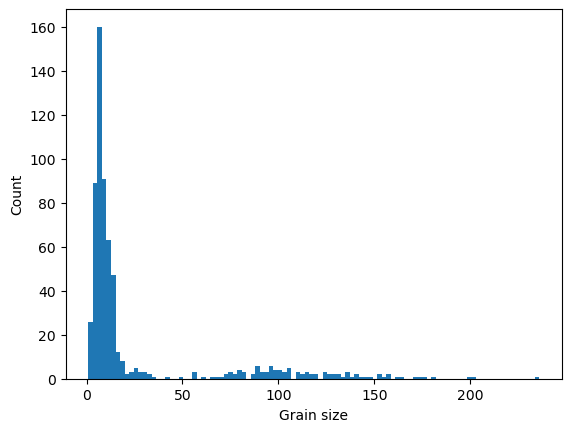

In [132]:
plt.hist(dataset[dataset['train_or_val']=='train']['n_grains'], bins=100)
plt.xlabel('Grain size')
plt.ylabel('Count')
plt.show()

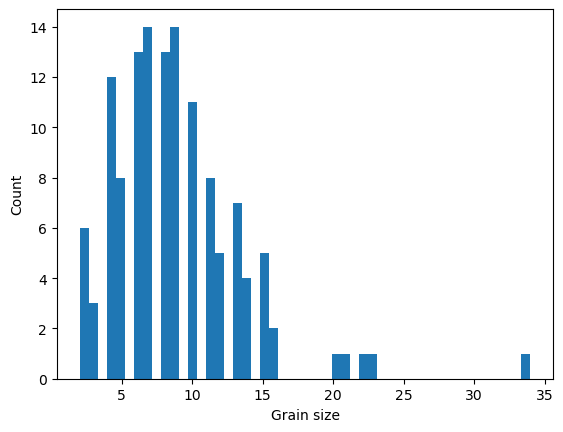

In [134]:
plt.hist(dataset[dataset['train_or_val']=='val']['n_grains'], bins=50)
plt.xlabel('Grain size')
plt.ylabel('Count')
plt.show()

In [135]:
dataset

n_grains train_or_val
tile_idx                       
0              153        train
1              102        train
2              114        train
3              140        train
4              101        train
...            ...          ...
744              8        train
745              7        train
746              7        train
747              5        train
748              5          val

[749 rows x 2 columns]

In [138]:
import shutil

In [140]:
for i in dataset.index:
    if dataset.loc[i,'train_or_val'] == 'train':
        shutil.copy(f'data/tiles/mean/tile_{i}.npy', f'data/tiles/mean/train/tile_{i}.npy')
        shutil.copy(f'data/tiles/raw/tile_{i}.npy', f'data/tiles/raw/train/tile_{i}.npy')
    else:
        shutil.copy(f'data/tiles/mean/tile_{i}.npy', f'data/tiles/mean/val/tile_{i}.npy')
        shutil.copy(f'data/tiles/raw/tile_{i}.npy', f'data/tiles/raw/val/tile_{i}.npy')

In [144]:
for root, dirs, files in os.walk('data/tiles/mean'):
    print(root)

data/tiles/mean
data/tiles/mean/train
data/tiles/mean/val


In [153]:
for fname in test_fnames:
    print('File: {}'.format(fname))
    x_mean = np.load(os.path.join('data/mean_quats_maps/', fname))
    x_raw = np.load(os.path.join('data/quat_ebsd_maps/', fname))
    
    tiles_mean = create_tiles(x_mean, tile_size=128)
    tiles_raw = create_tiles(x_raw, tile_size=128)
    
    for idx, tile_mean in enumerate(np.array(tiles_mean)[:,:,:,0]):
        n_grains = len(np.unique(tile_mean))
        tile_idx = len(os.listdir('data/tiles/raw/test/'))

        np.save(f'data/tiles/raw/test/test_tile_{tile_idx}.npy',  tiles_raw[idx])
        np.save(f'data/tiles/mean/test/test_tile_{tile_idx}.npy', tile_mean)


File: 19-B590.npy


21